# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [23]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install dash
%pip install dash_ag_grid

import dash_ag_grid as dag;
import numpy as np;
import ipywidgets as widgets;
from dash import Dash, html;
import matplotlib.pyplot as plt;
import pandas as pd;
from IPython.display import display, HTML;

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [24]:
df = pd.read_csv('/data.csv');
pd.options.display.max_columns = df.shape[1]
df.shape

(1389, 28)

In [25]:
df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,22.771778,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,13.668172,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,11.000000,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,22.000000,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,33.000000,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,59.000000,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


In [26]:
df.head

<bound method NDFrame.head of       Unnamed: 0        date   time            comp         round  day venue  \
0              1  2021-08-15  16:30  Premier League   Matchweek 1  Sun  Away   
1              2  2021-08-21  15:00  Premier League   Matchweek 2  Sat  Home   
2              3  2021-08-28  12:30  Premier League   Matchweek 3  Sat  Home   
3              4  2021-09-11  15:00  Premier League   Matchweek 4  Sat  Away   
4              6  2021-09-18  15:00  Premier League   Matchweek 5  Sat  Home   
...          ...         ...    ...             ...           ...  ...   ...   
1384          38  2021-05-02  19:15  Premier League  Matchweek 34  Sun  Away   
1385          39  2021-05-08  15:00  Premier League  Matchweek 35  Sat  Home   
1386          40  2021-05-16  19:00  Premier League  Matchweek 36  Sun  Away   
1387          41  2021-05-19  18:00  Premier League  Matchweek 37  Wed  Away   
1388          42  2021-05-23  16:00  Premier League  Matchweek 38  Sun  Home   

     result   gf   ga        opponent   xg  xga  poss  attendance  \
0         L  0.0  1.0       Tottenham  1.9  1.3  64.0     58262.0   
1         W  5.0  0.0    Norwich City  2.7  0.1  67.0     51437.0   
2         W  5.0  0.0         Arsenal  3.8  0.1  80.0     52276.0   
3         W  1.0  0.0  Leicester City  2.9  0.8  61.0     32087.0   
4         D  0.0  0.0     Southampton  1.1  0.4  63.0     52698.0   
...     ...  ...  ...             ...  ...  ...   ...         ...   
1384      L  0.0  4.0       Tottenham  0.5  2.0  34.0         NaN   
1385      L  0.0  2.0  Crystal Palace  0.7  2.1  50.0         NaN   
1386      W  1.0  0.0         Everton  1.6  1.3  38.0         NaN   
1387      L  0.0  1.0   Newcastle Utd  0.8  1.5  50.0     10000.0   
1388      W  1.0  0.0         Burnley  0.6  1.0  41.0      5000.0   

             captain formation          referee  match report  notes    sh  \
0        Fernandinho     4-3-3   Anthony Taylor  Match Report    NaN  18.0   
1     İlkay Gündoğan     4-3-3     Graham Scott  Match Report    NaN  16.0   
2     İlkay Gündoğan     4-3-3  Martin Atkinson  Match Report    NaN  25.0   
3     İlkay Gündoğan     4-3-3     Paul Tierney  Match Report    NaN  25.0   
4        Fernandinho     4-3-3    Jonathan Moss  Match Report    NaN  16.0   
...              ...       ...              ...           ...    ...   ...   
1384       John Egan   3-4-1-2   Andre Marriner  Match Report    NaN   8.0   
1385       John Egan     3-5-2     Simon Hooper  Match Report    NaN   7.0   
1386       John Egan     3-4-3    Jonathan Moss  Match Report    NaN  10.0   
1387       John Egan     3-4-3     Robert Jones  Match Report    NaN  11.0   
1388       John Egan     3-4-3     Kevin Friend  Match Report    NaN  12.0   

       sot  dist   fk   pk  pkatt  season              team  
0      4.0  16.9  1.0  0.0    0.0    2022   Manchester City  
1      4.0  17.3  1.0  0.0    0.0    2022   Manchester City  
2     10.0  14.3  0.0  0.0    0.0    2022   Manchester City  
3      8.0  14.0  0.0  0.0    0.0    2022   Manchester City  
4      1.0  15.7  1.0  0.0    0.0    2022   Manchester City  
...    ...   ...  ...  ...    ...     ...               ...  
1384   1.0  17.4  0.0  0.0    0.0    2021  Sheffield United  
1385   0.0  11.4  1.0  0.0    0.0    2021  Sheffield United  
1386   3.0  17.0  0.0  0.0    0.0    2021  Sheffield United  
1387   1.0  16.0  1.0  0.0    0.0    2021  Sheffield United  
1388   3.0  17.0  0.0  0.0    0.0    2021  Sheffield United  

[1389 rows x 28 columns]>

In [27]:
df.dtypes

,0
Unnamed: 0,int64
date,object
time,object
comp,object
round,object
day,object
venue,object
result,object
gf,float64
ga,float64


## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

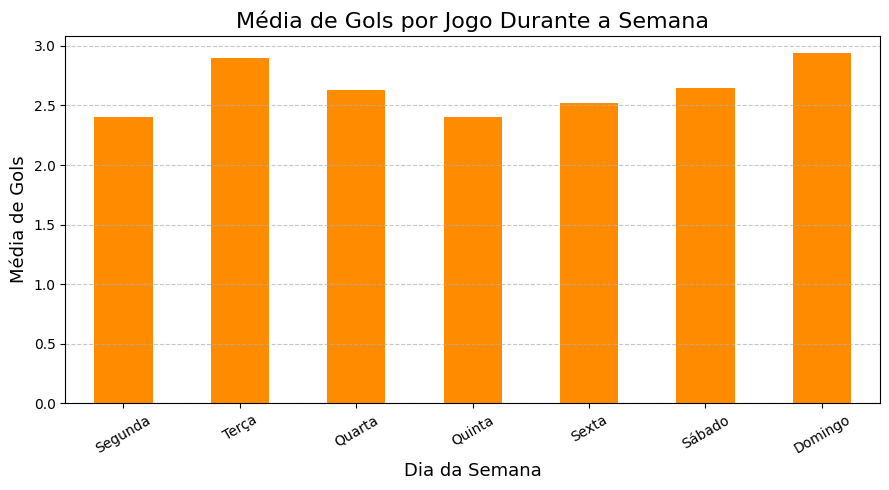

In [28]:
df['total_goals'] = df['gf'] + df['ga']

gols_por_dia = df.groupby('day')['total_goals'].sum()
jogos_por_dia = df['day'].value_counts()

media_gols_por_jogo = (gols_por_dia / jogos_por_dia).reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.figure(figsize=(9,5))
ax = media_gols_por_jogo.plot(kind='bar', color='darkorange')

ax.set_xticklabels(['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'], rotation=30)
plt.title('Média de Gols por Jogo Durante a Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=13)
plt.ylabel('Média de Gols', fontsize=13)

plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

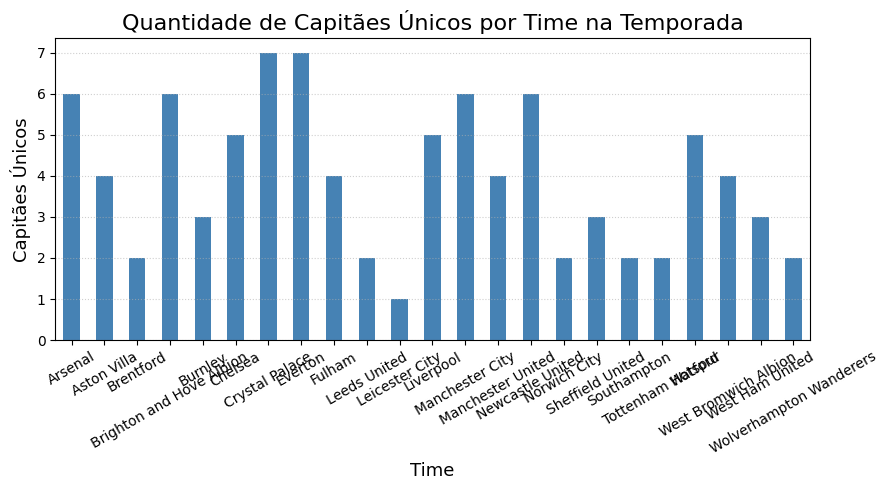

In [29]:
capitaes_unicos_por_equipe = df.groupby('team')['captain'].nunique()

fig, ax = plt.subplots(figsize=(9,5))
capitaes_unicos_por_equipe.plot(kind='bar', color='steelblue', ax=ax)

ax.set_title('Quantidade de Capitães Únicos por Time na Temporada', fontsize=16)
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('Capitães Únicos', fontsize=13)
ax.set_xticklabels(capitaes_unicos_por_equipe.index, rotation=30, ha='center')

plt.xticks(rotation=30)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

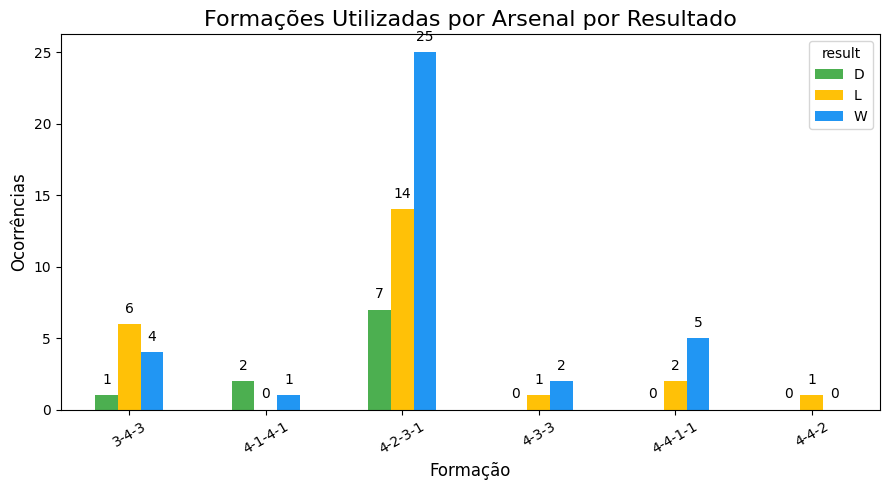

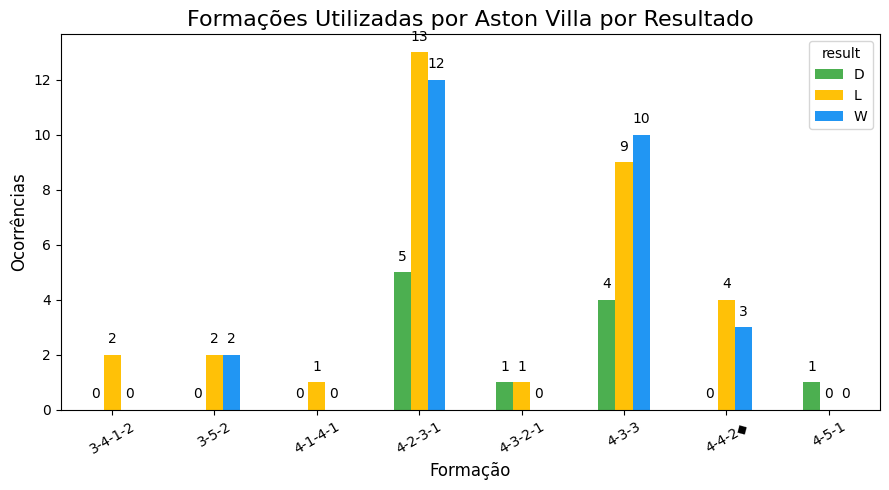

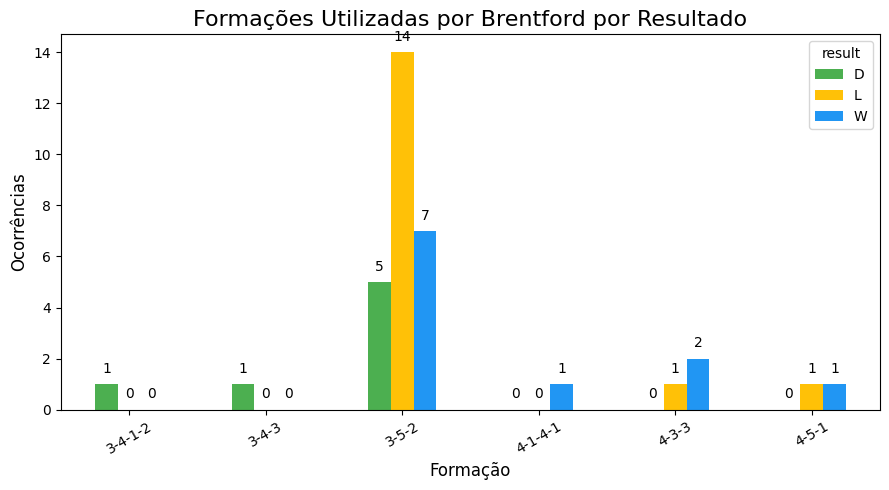

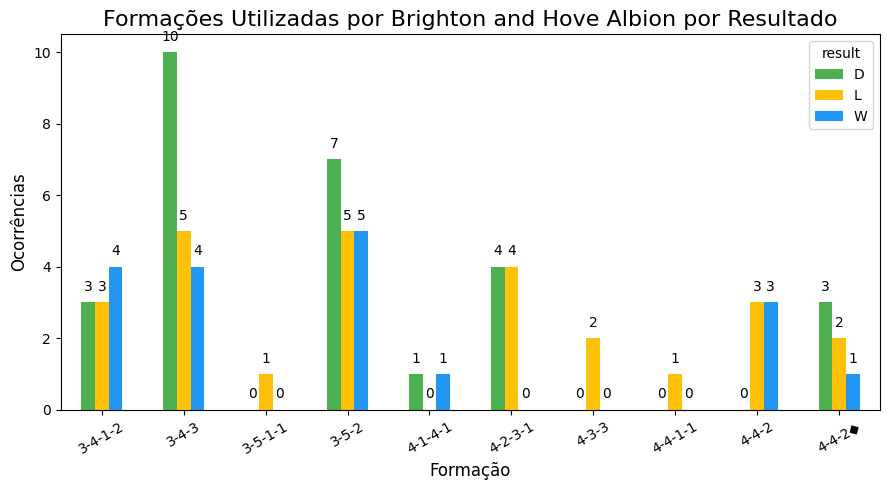

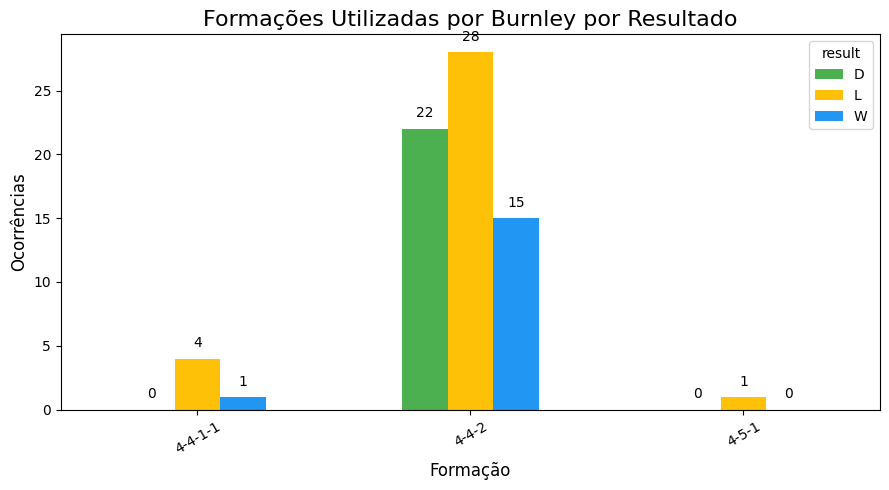

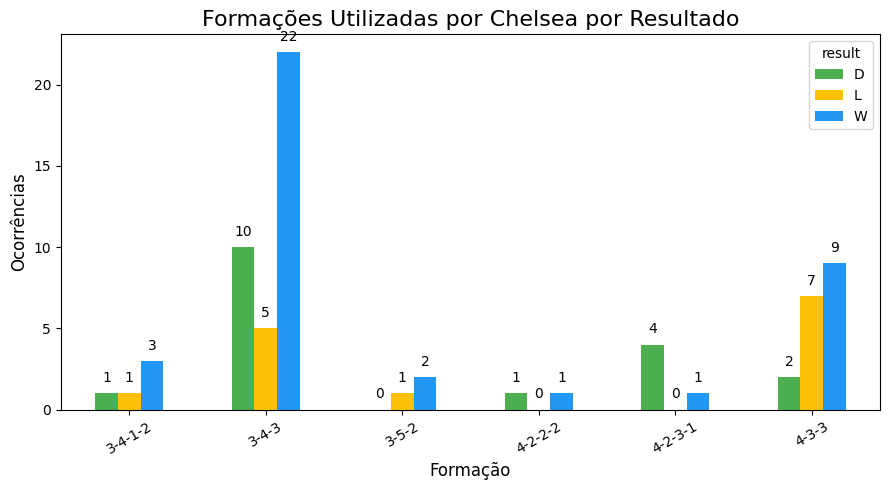

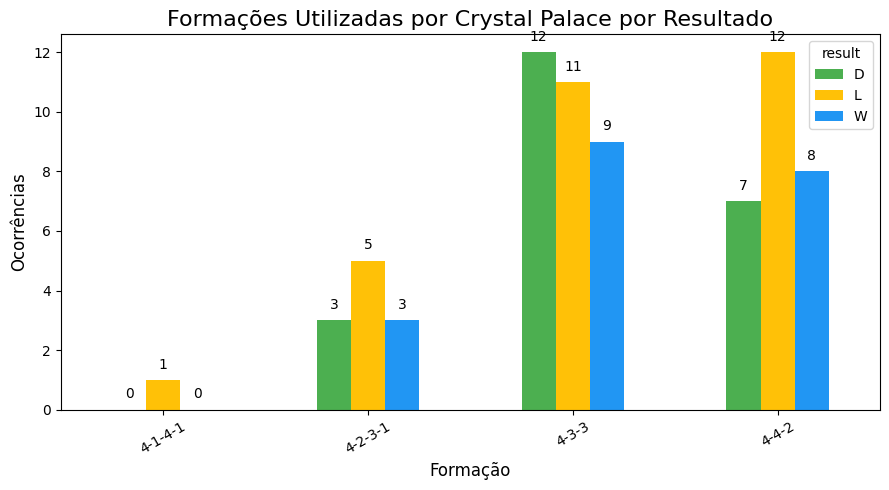

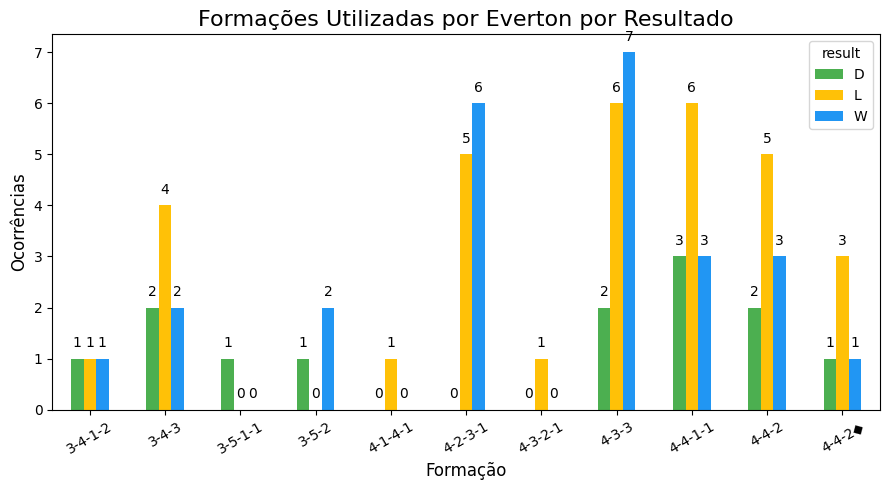

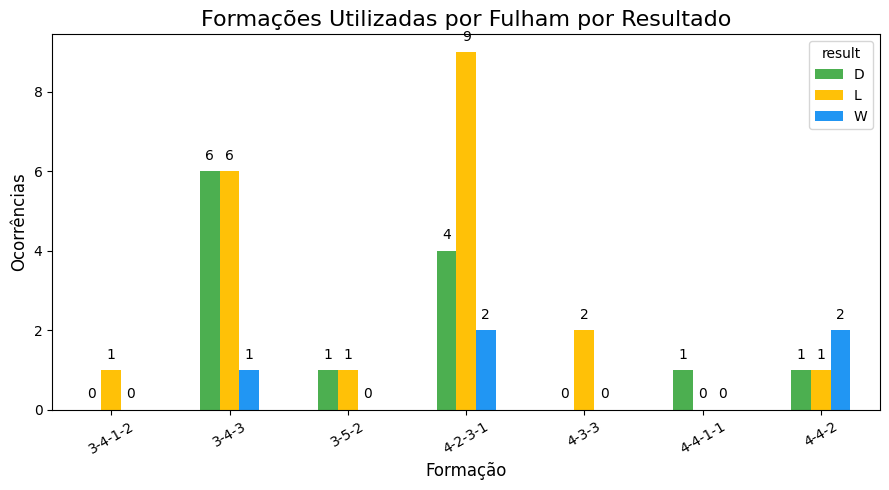

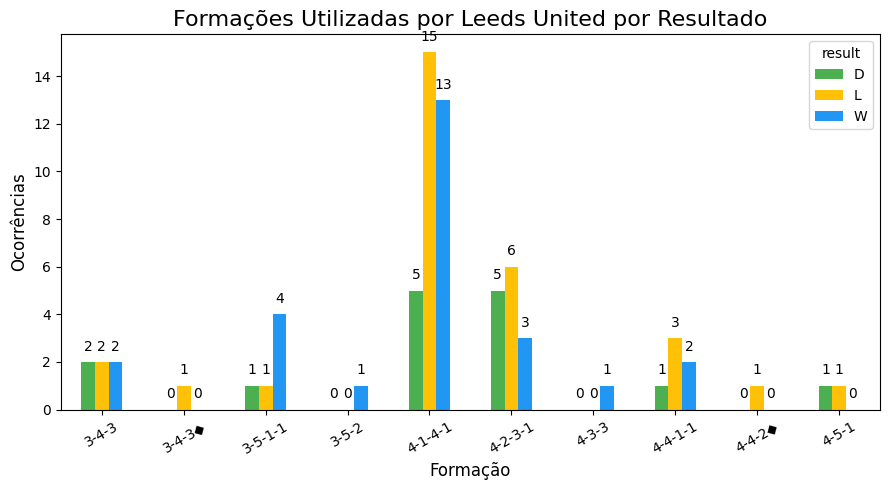

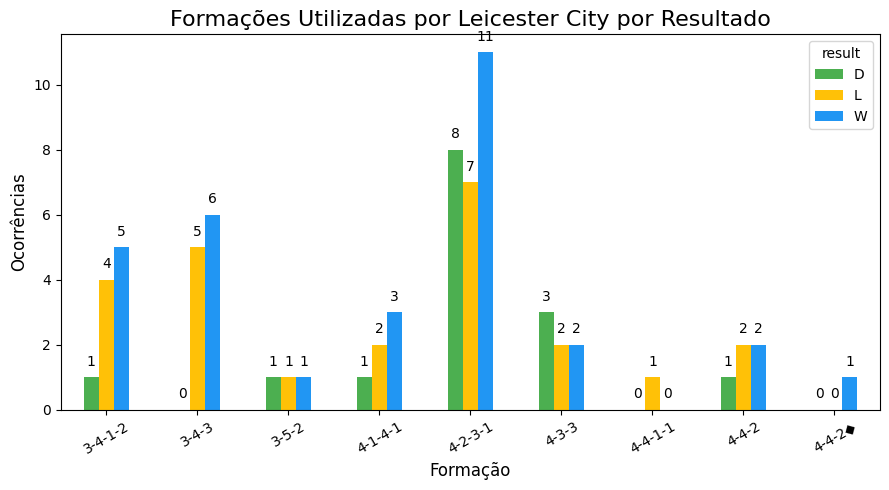

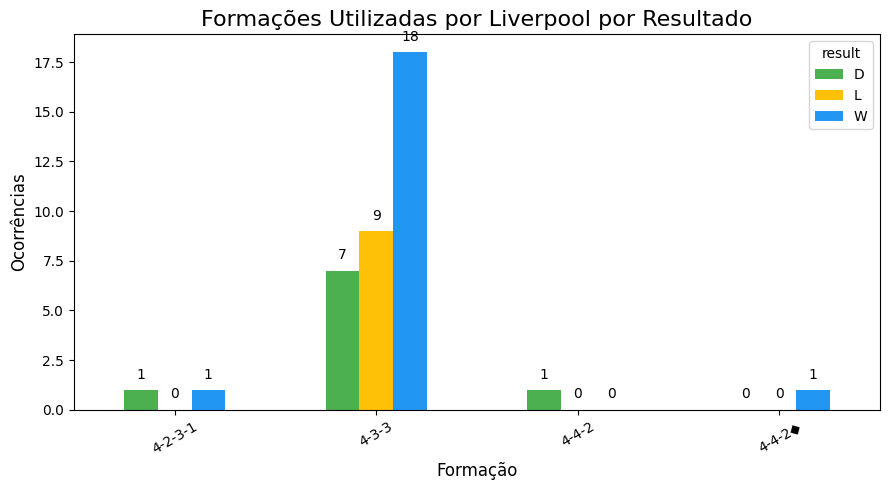

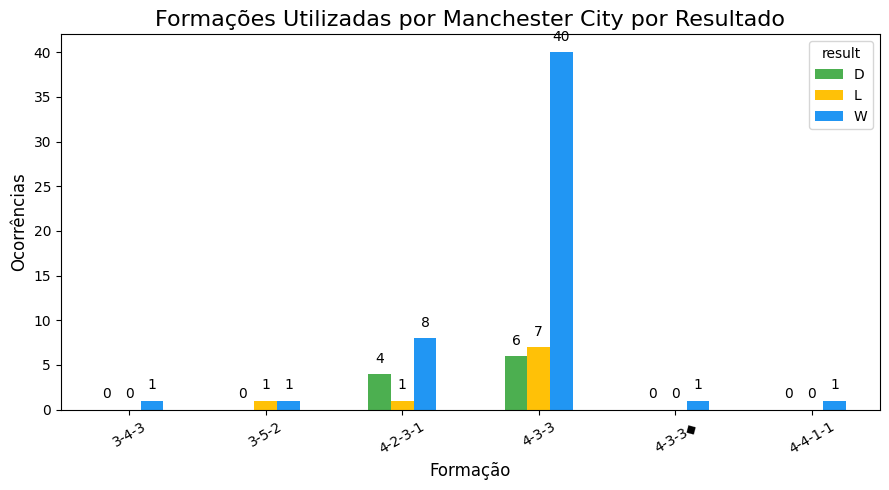

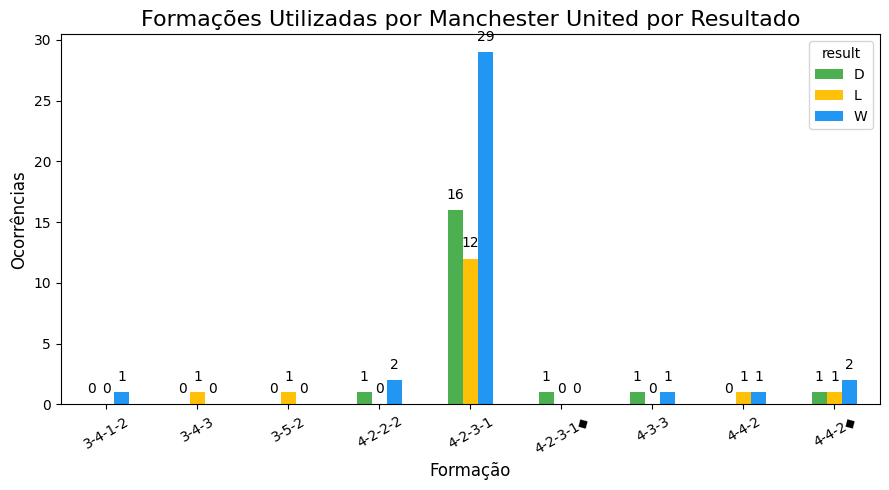

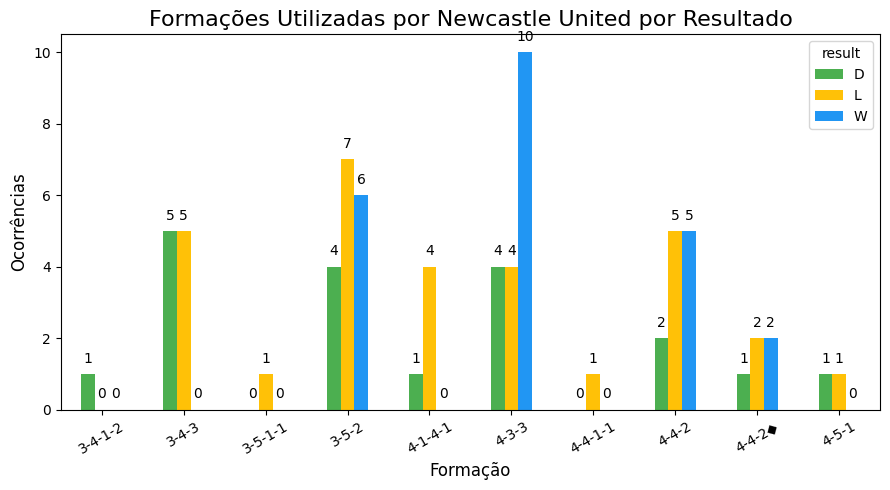

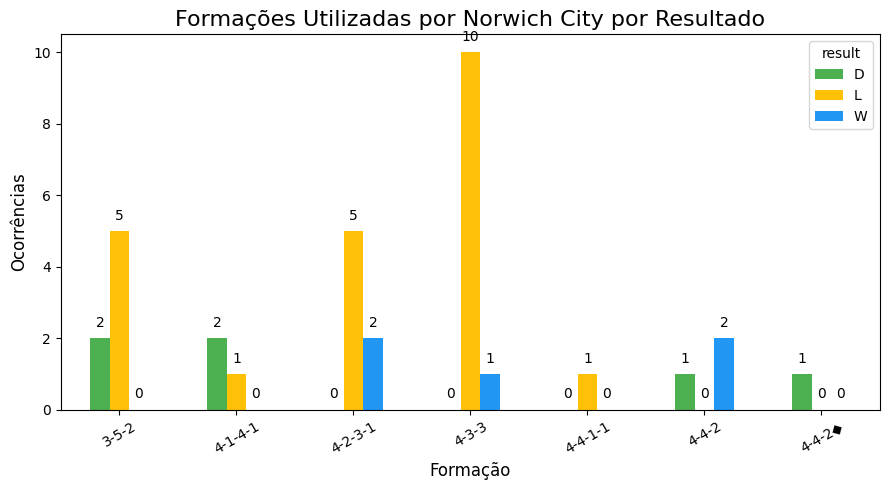

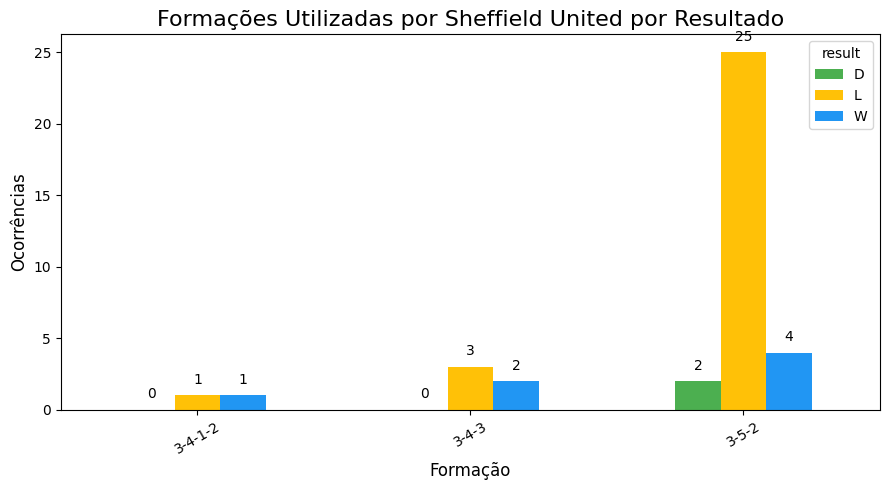

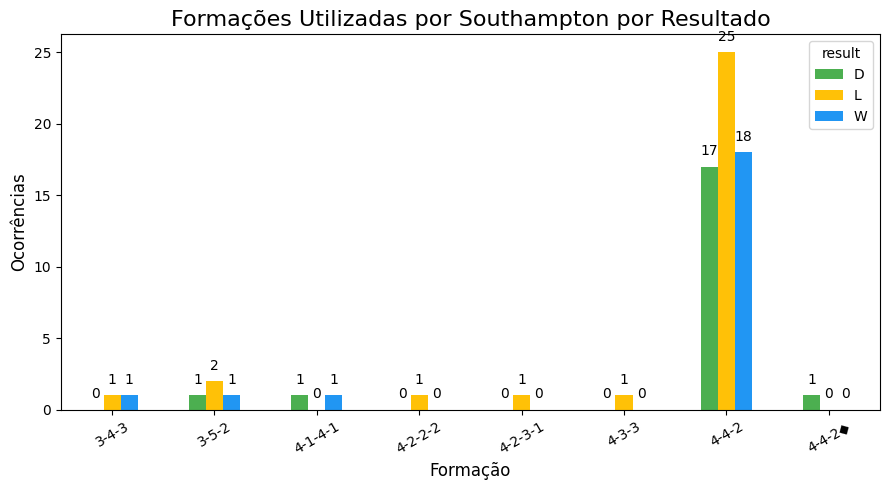

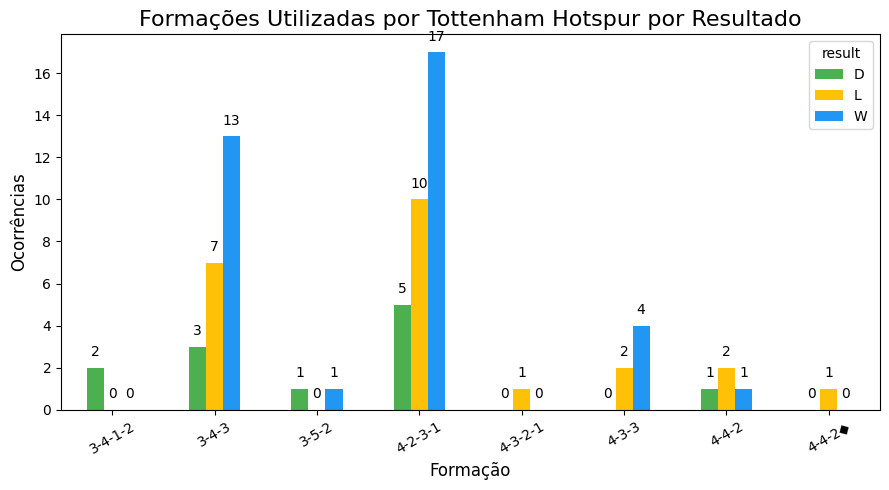

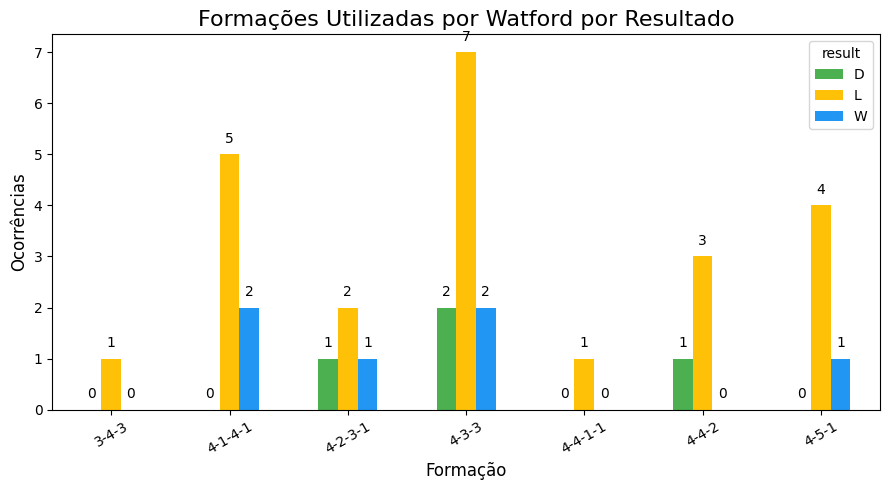

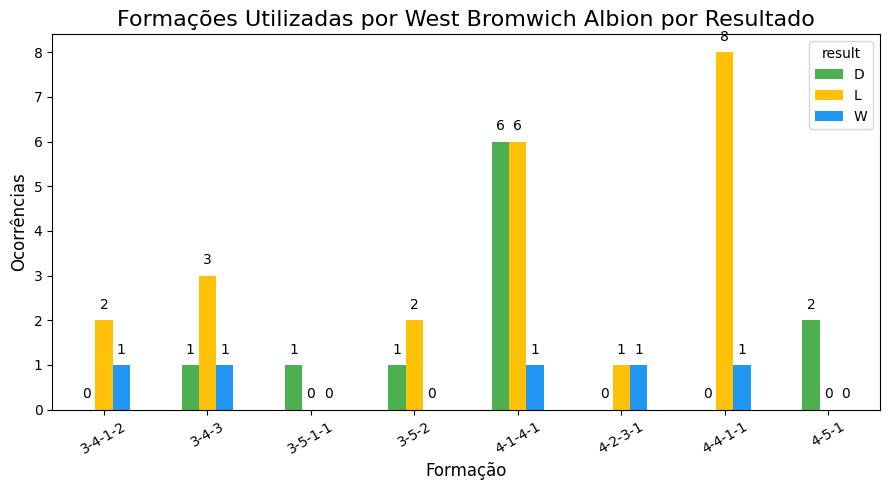

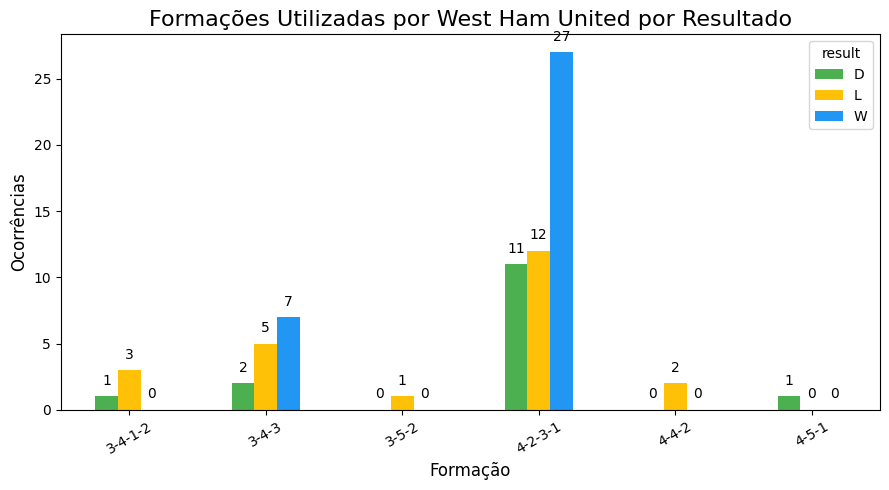

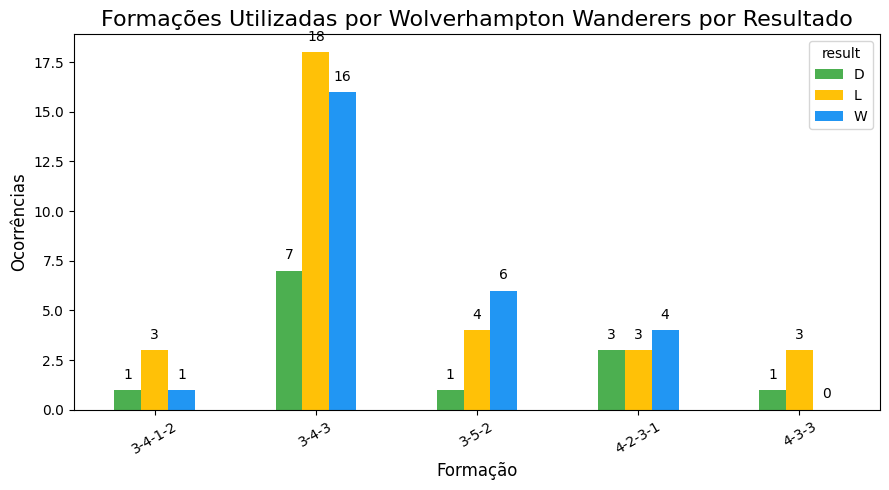

In [30]:
df0 = df.groupby(['team', 'formation', 'result'])['result'].count().reset_index(name="count")

df_pivot = df0.pivot_table(index='team', columns='result', values='count', aggfunc='sum', fill_value=0)

equipes = df0['team'].unique()
for equipe in equipes:
    dados_equipe = df0[df0['team'] == equipe]
    pivot_dados_equipe = dados_equipe.pivot(index='formation', columns='result', values='count').fillna(0)

    ax = pivot_dados_equipe.plot(kind='bar', stacked=False, figsize=(9, 5), color=['#4CAF50', '#FFC107', '#2196F3'])

    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 6), textcoords='offset points')

    plt.title(f'Formações Utilizadas por {equipe} por Resultado', fontsize=16)
    plt.xlabel('Formação', fontsize=12)
    plt.ylabel('Ocorrências', fontsize=12)
    plt.xticks(rotation=30)

    plt.tight_layout()
    plt.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

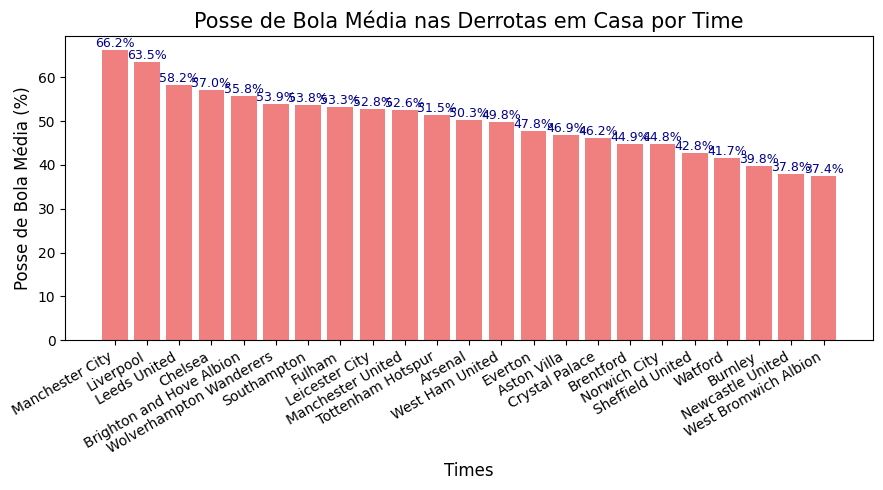

In [31]:
df_derrotas_casa = df[(df['result'] == 'L') & (df['venue'] == 'Home')]

media_posse_derrotas = df_derrotas_casa.groupby('team')['poss'].mean().reset_index()
media_posse_derrotas = media_posse_derrotas.sort_values(by='poss', ascending=False)

plt.figure(figsize=(9, 5))
barras = plt.bar(media_posse_derrotas['team'], media_posse_derrotas['poss'], color='lightcoral')

for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{altura:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='darkblue')

plt.title('Posse de Bola Média nas Derrotas em Casa por Time', fontsize=15)
plt.xlabel('Times', fontsize=12)
plt.ylabel('Posse de Bola Média (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [32]:
df0 = df.groupby(['team', 'result'])['result'].count().reset_index(name="count")
df0 = df0.pivot_table(index='team', columns='result', values='count').reset_index()

df0['Pontos'] = df0['W'] * 3 + df0['D']

df0 = df0.sort_values(by='Pontos', ascending=False).reset_index(drop=True)

def obter_url_logo_time(nome_time):
    return f"https://logodetimes.com/times/{nome_time.lower().replace(' ', '-')}-football-club/{nome_time.lower().replace(' ', '-')}-football-club-256.png"

df0['img'] = df0['team'].apply(obter_url_logo_time)

def renderizar_tabela(df):
    html = '<table border="1" cellpadding="5">'
    html += '<tr><th>Posição</th><th>Logo</th><th>Time</th><th>Pontuação</th></tr>'

    for idx, row in df.iterrows():
        html += f"<tr><td>{idx + 1}</td>"
        html += f"<td><img src='{row['img']}' width='40' height='40'></td>"
        html += f"<td>{row['team']}</td><td>{row['Pontos']}</td></tr>"

    html += '</table>'
    return HTML(html)

renderizar_tabela(df0)

Posição,Logo,Time,Pontuação
1,,Manchester City,166.0
2,,Chelsea,132.0
3,,Manchester United,128.0
4,,Arsenal,121.0
5,,Tottenham Hotspur,120.0
6,,West Ham United,117.0
7,,Leicester City,108.0
8,,Wolverhampton Wanderers,94.0
9,,Leeds United,93.0
10,,Aston Villa,92.0


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [33]:
resumo_time = df.groupby('team').agg(
    publico_total=('attendance', 'sum'),
    publico_medio=('attendance', 'mean')
).reset_index()

resumo_time['publico_medio'] = resumo_time['publico_medio'].round()

dadosLinhas = []
for _, linha in resumo_time.iterrows():
    jogos_time = df[df['team'] == linha['team']].to_dict('records')
    dadosLinhas.append({
        'team': linha['team'],
        'publico_total': linha['publico_total'],
        'publico_medio': linha['publico_medio'],
        'games': jogos_time
    })

app = Dash(__name__)

colunasMaster = [
    {
        "headerName": "Equipe",
        "field": "team",
        "cellRenderer": "agGroupCellRenderer",
    },
    {"headerName": "Público Médio", "field": "publico_medio"},
    {"headerName": "Público Total", "field": "publico_total"},
]

colunasDetalhes = [
    {"headerName": "Data", "field": "date"},
    {"headerName": "Adversário", "field": "opponent"},
    {"headerName": "Estádio", "field": "venue"},
    {"headerName": "Público", "field": "attendance"},
]

app.layout = html.Div(
    [
        dag.AgGrid(
            id="resumo-publico-time",
            enableEnterpriseModules=True,
            columnDefs=colunasMaster,
            rowData=dadosLinhas,
            columnSize="sizeToFit",
            masterDetail=True,
            detailCellRendererParams={
                "detailGridOptions": {
                    "columnDefs": colunasDetalhes,
                },
                "detailColName": "games",
                "suppressCallback": True,
            },
            dashGridOptions={"detailRowAutoHeight": True, "animateRows": True},
        ),
    ]
)

if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>